In [43]:
import os
import pandas as pd
import matplotlib.pyplot as plt


<class 'ModuleNotFoundError'>: No module named 'seaborn'

In [32]:
all_data = pd.read_csv("IS.csv")
all_data.head()

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35
3,Australia,Melbourne,University of Melbourne,Engineering,Master,2.0,42000,71.2,1400,450,650,1.52
4,Germany,Munich,Technical University of Munich,Mechanical Engineering,Master,2.0,500,70.5,1100,75,550,0.92


In [33]:
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())


,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate


In [31]:
all_data = all_data.dropna(how='all')
all_data.head()


,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate,cost


In [5]:
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate


In [40]:
all_data['cost']=all_data['Tuition_USD']+ all_data['Rent_USD']+all_data['Visa_Fee_USD']+all_data['Insurance_USD'] 
#filter = all_data["Program"] == "Computer Science"
#all_data.where(filter).dropna()
all_data = all_data[all_data["Program"] == "Computer Science"].dropna()
#].dropna()
#print(all_data)
all_data = all_data[
    (all_data["Program"] == "Computer Science")
     & (all_data["Level"] == "Master")
].dropna()


In [41]:
all_data['cost'] = (
    all_data['Tuition_USD'] +
    all_data['Rent_USD'] +
    all_data['Visa_Fee_USD'] +
    all_data['Insurance_USD']
)
all_data
# Filter for "Computer Science" and remove rows with any NaN values
#all_data = all_data[all_data["Program"] == "Computer Science"].dropna()

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate,cost
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00,59260
41,USA,Seattle,University of Washington,Computer Science,Master,2.0,38900,83.4,2000,160,1500,1.00,42560
43,UK,Glasgow,University of Glasgow,Computer Science,Master,1.0,33500,67.5,1100,485,800,0.79,35885
44,India,Bangalore,Indian Institute of Science,Computer Science,Master,2.0,2500,45.6,500,200,300,83.20,3500
46,Poland,Warsaw,University of Warsaw,Computer Science,Master,2.0,3800,51.2,650,80,350,4.02,4880
...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,Malaysia,Kuala Lumpur,University of Malaya,Computer Science,Master,2.0,8500,55.4,500,120,400,4.65,9520
853,France,Paris,Sorbonne University,Computer Science,Master,2.0,4500,84.3,1800,99,850,0.92,7249
862,Saudi Arabia,Dhahran,KFUPM,Computer Science,Master,2.0,4500,68.5,700,200,800,3.75,6200
868,Malaysia,Kuching,UNIMAS,Computer Science,Master,2.0,7000,49.5,380,120,400,4.65,7900


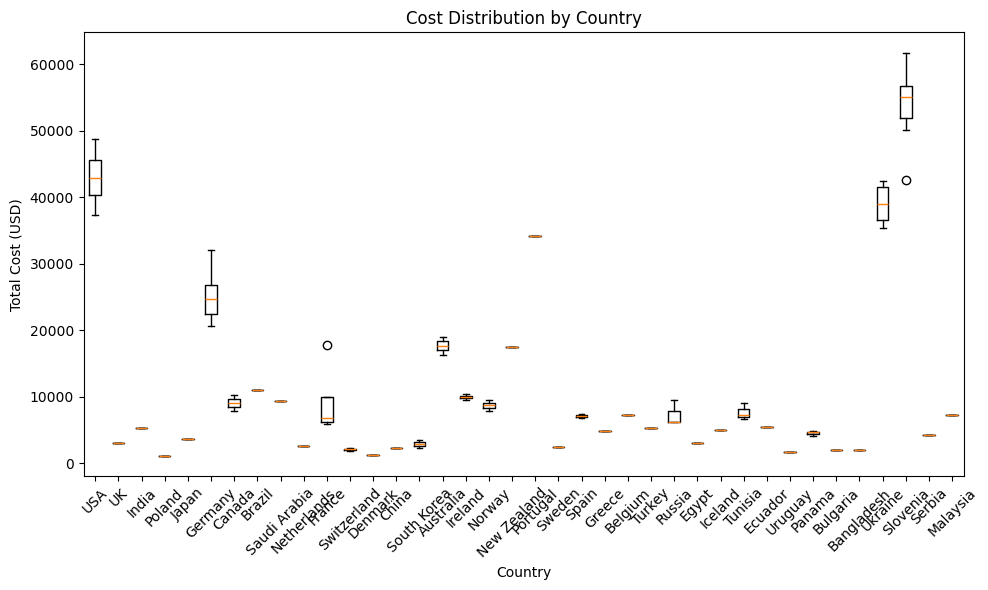

In [49]:
import matplotlib.pyplot as plt

# Group data by university
grouped = [group["cost"].values for name, group in all_data.groupby("Country")]
labels = list(all_data["Country"].unique())

plt.figure(figsize=(10, 6))
plt.boxplot(grouped, labels=labels, vert=True)
plt.xticks(rotation=45)
plt.title("Cost Distribution by Country")
plt.ylabel("Total Cost (USD)")
plt.xlabel("Country")
plt.tight_layout()
plt.show()

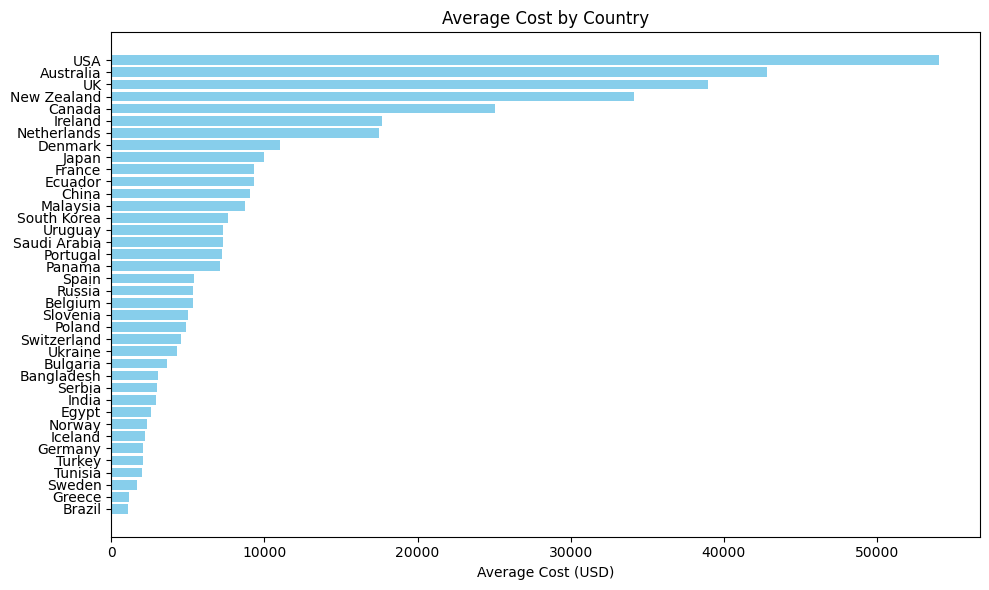

In [47]:
import matplotlib.pyplot as plt

# Calculate average cost per university
avg_cost = all_data.groupby('Country')['cost'].mean().sort_values()

# Plot
plt.figure(figsize=(10, 6))
plt.barh(avg_cost.index, avg_cost.values, color='skyblue')
plt.xlabel('Average Cost (USD)')
plt.title('Average Cost by Country')
plt.tight_layout()
plt.show()